In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Table of Contents
- [Display Options](#Display_Options)
- [Data Frames](#DataFrame)
    - [Initialize](#initalize_df)
    - [Columns](#columns)
        - [Add Column (Standard, Apply(), Condition)](#add_col)
        - [Change order](#change_col_order)
        - [Remove Column](#remove_col)
        - [Sum Columns](#sum_col)
        - [Get Column Names](#col_names)
        - [Rename Columns](#rename_col)
    - [Rows](#rows)
        - [loc](#loc)
        - [change a single value](#change_single_value)
        - [iloc](#iloc)
        - [Show Rows](#show_row)
        - [remove row](#remove_row)
        - [sum rows](#sum_row)
        - [Iterate over rows](#iter_rows)
    - [Functions](#func_dataframe)
        - [Shape](#shape_df)
        - [DTypes](#Dtype)
        - [Values](#values_df)
        - [Index](#index_df)
        - [Show Rows](#show_row)
        - [Copy](#copy_df)
        - [Reset Index](#reset_index)
        - [Isin ()](#isin_)
        - [Operations (Addition, Multiplication, sum row/column)](#operations_df)
        - [Look at data (head, sample, columns, describe, shape, mean, index, index.is_unique, value count (which value is represented how often, unique values of column))](#look_data)
        - [Clean the data (sort, fillna, dropna, drop_duplicates)](#clean_data)
        - [Concatenate](#concatenate_)
        - [Merge](#merge)
        - [Dummy Variables](#dummies)
    - [Group by](#group_by)
        - [Basic](#basic_groupby)
        - [Access groups](#access_groups_groupby)
        - [Functions (count, sum)](#func_groupby)
        - [Apply](#apply_groupby)
        - [Aggregate](#aggregate_group)
        - [Unstack](#unstack_groupby)
    - [Select](#select_df)
        - [Standard](#standard_select)
        - [Query](#query_select)
    - [Datetime](#datetime_)
    - [Gimmicks](#df_tricks)
        - [Pivot()](#pivot_df)
        - [Crosstab()](#crosstab)
        - [Transform category to int](#cat_to_int_df)
        - [Transform dtypes](#transform_dtype)
        - [Binning using cut](#binning_cut)
        - [Split Dataset](#split_dataset)
        - [Bootstrap](#bootstrap)
    - [Statistics](#statistics)
        - [Check for normal or exponential distribution (k-test)](#k_test)
        - [T-test](#t_test)
        - [Binomial Test (test whether the probability for success is p)](#binom_test)
        - [Pearson Correlation](#pearson_corr)
        - [Spearman Correlation](#spearson_corr)
        - [Plot Correlation (SNS)](#sns_corr_plot)
        - [Generate samples](#make_samples)
    - [Write and Read files](#write_read_file)
- [Series](#Series) 
    - [Initialization](#initialize_ser)
    - [Functions (detect NaN - isnull, value_counts)](#func_series)
- [Numpy](#numpy) 
    - [Random Numbers](#random_numpy)
    - [Nan Numbers](#nan_numpy)
- [List](#list)
    - [Iterate over several lists](#iterate_zip)
- [String](#string)
    - [Functions](#string_func)
        - [.endswith()](#endswith)
        - [lower/upper case](#upp_low_case)
        - [remove/replace characters](#remove_char)
- [General](#general_stuff)
    - [Decimals after comma](#decimal_after_comma)
    - [Linspace / Arange](#linspace)
    - [Calculations](#general_calcs)
        - [Mean Squared Error](#mserror)
    - [Warnings](#warnings)

Display Options: <a class="anchor" id="Display_Options"></a>

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# DataFrames: <a class="anchor" id="DataFrame"></a>

In [4]:
#Hide
#generate 25 random values between 0 and 1
ftr1 = np.random.random(25)
ftr2 = np.random.random(25)
ftr3 = np.random.random(25)

In [5]:
list_ = ['la', 'le', 'li', 'lo', 'lu']

## Initialize <a class="anchor" id="initalize_df"></a>

In [6]:
df = pd.DataFrame([], columns=['ftr1', 'ftr2', 'ftr3'])

frame = {'ftr1': pd.Series(ftr1), 'ftr2': pd.Series(ftr2), 'ftr3': pd.Series(ftr3)}

df = pd.DataFrame(frame)

Transform a list to a DataFrame:

In [7]:
tmp = []
for position, value in enumerate(list_):
    tmp.append({'position':position, 'value': value})

tmp_df = pd.DataFrame(tmp)

'''skip first element in enumerate:
    for position, value in enumerate(list_[1:]):'''

'skip first element in enumerate:\n    for position, value in enumerate(list_[1:]):'

## Columns: <a class='anchor' id='columns'></a>

Add Column: <a class='anchor' id='add_col'></a>

In [8]:
'''Standard'''
df_changed = df.copy()
df_changed['new_ftr'] = df['ftr2']
#df_changed

'''apply()'''
df_changed['new_ftr2'] = df['ftr1'].apply(lambda x: 1 if x < 0.5 else 0)
#df_changed

'''Condition'''
#Separate Conditions with commas if there are severals
condition = [
    (df['ftr1'] < 0.7) & (df['ftr2'] > 0.3)
]
value = [1]
df_changed['new_ftr3'] = np.select(condition, value, default=0)
#df_changed

In [94]:
df_changed = df.copy()

def add_col_ftr4(row):
    return float(row['ftr1']*row['ftr2'])
#in some cases the float is crucial

df_changed['ftr4'] = df_changed.apply(add_col_ftr4, axis=1)

#df_changed.head(1)

Change Order: <a class='anchor' id='change_col_order'></a>

In [9]:
df_changed = df[['ftr2', 'ftr3', 'ftr1']]
#df_changed.head()

Remove Column: <a class='anchor' id='remove_col'></a>

In [10]:
df_changed = df.copy()
df_changed = df_changed.drop('ftr1', axis=1)
#df_changed.head()

Sum up Columns: <a class='anchor' id='sum_col'></a>

In [11]:
sum_column = df.sum(axis=0)

Get Column Names: <a class='anchor' id='col_names'></a>

In [12]:
df.columns
a=1

Rename Columns: <a class='anchor' id='rename_col'></a>

In [13]:
df_changed=df.copy()
df_changed = df_changed.rename(columns={'ftr1': 'new_name'})
#df_changed.head(1)

## Rows: <a class='anchor' id='rows'></a>

loc <a class='anchor' id='loc'></a> <br>
loc uses the index, so either a number or a label.

In [14]:
df.loc[0]
df.loc[df['ftr1']>0.5]
df.loc[1:4]
a=1

Change single Value: <a class='anchor' id='change_single_value'></a>

In [15]:
df_changed = df.copy()
idx = 2
df_changed.loc[idx, 'ftr1'] = 10

#change multiple values
df_changed = df.copy()
df_changed.loc[df_changed['ftr1'] > 0.5, 'ftr1'] = 2

iloc <a class='anchor' id='iloc'></a> <br>
like loc but uses position instead of index/label:

In [16]:
df.iloc[idx]
#return elements 1 to 4
df.iloc[1:4]
a=1

### remove a row <a class='anchor' id='remove_row'></a>

In [17]:
#idx = 2
df_changed = df.copy()
df_changed = df_changed.drop(idx)
#df_changed.head()

### sum rows: <a class='anchor' id='sum_row'></a>

In [18]:
sum_row = df[['ftr1','ftr2']].sum(axis=1) #sums up every row of ftr1 and ftr2

### iterate over rows: <a class='anchor' id='iter_rows'></a>

In [19]:
for df_idx, df_row in df.iterrows():
    a=1

## Functions <a class='anchor' id='func_dataframe'></a>

### Shape: <a class='anchor' id='shape_df'></a>

In [20]:
df.shape
a=1

### Types: <a class='anchor' id='Dtype'></a>

In [21]:
#Returns the different types of the columns
df.dtypes
a=1

### Values
Shows all values <a class='anchor' id='values_df'></a>

In [22]:
df.values
a=1

### Index <a class='anchor' id='index_df'></a>

In [23]:
#return indexes
df.index

RangeIndex(start=0, stop=25, step=1)

### Show rows: <a class='anchor' id='show_row'></a>

In [24]:
n=3
#Show first n rows:
df[:n]
a=1

### Copy:
<a class='anchor' id='copy_df'></a>

In [25]:
df_changed = df.copy()

### Reset index <a class='anchor' id='reset_index'></a>

In [26]:
df_changed = df[df['ftr1']<0.2]
#adding a new index
df_changed.reset_index()
#adding a new index plus removing the old one
df_changed.reset_index(drop=True)
a=1

### Isin() <a class='anchor' id='isin_'></a>

In [27]:
df_special = pd.DataFrame([['Alice', 21], ['Bob', 22], ['Charlie', 23]],
                  columns=['Name', 'Age'])

df_special['Name'].isin(['Flo','Lars'])
df_special['Name'].isin(['Bob','Lars'])

any(df_special['Name'].isin(['Flo','Lars']))
any(df_special['Name'].isin(['Bob','Lars']))

a=1


### Operations: <a class='anchor' id='operations_df'></a>

In [28]:
'''Addition: add one dataframe to another'''
df_added = df.add(df)
#df_added.head()
#you can also df.add(df, fill_value = 3) to avoid nans. Replaces NaN values by 3.
df_changed= df.copy()
df_changed.loc[2,'ftr1'] = np.nan
df_added_nan = df.add(df_changed, fill_value=3)
#df_added_nan.head()

'''sum rows '''
sum_row = df[['ftr1','ftr2']].sum(axis=1) #sums up every row of ftr1 and ftr2
'''sum column'''
sum_column = df.sum(axis=0)

'''Multiplication'''
double = df_changed['ftr1'].mul(2)

multiplied_columns = df_changed['ftr1'] * (1 - df_changed['ftr2'])


### Look at the data: <a class='anchor' id='look_data'></a>

In [29]:
df.head(1)
df.sample() #like head() but random
#df.sample(5, replace=True, weights='ftr1') #Weights high values for ftr1 higher (higher probability to select those)

df.columns
df.index
df.index.is_unique
df.shape
df.describe()
df['ftr1'].describe()
df.mean()
#df_changed.mean(skipna=True, numeric_only=True)

#count which value is represented how often
df['ftr1'].value_counts()
#Returns all values of a dataframes column and the UNIQUE VALUES:
df_special = pd.DataFrame([['Alice', 21], ['Bob', 22], ['Charlie', 23], ['Charlie', 23], ['Charlie', 23]], columns=['Name', 'Age'])
s = pd.Categorical(df_special['Name'])
unique_values = s.categories

a=1

### Clean the data: <a class='anchor' id='clean_data'></a>

In [30]:
df_changed = df.copy()

#order the index
df_changed.sort_index(ascending=False) #by default alphabetically or ascending
df_changed = df_changed.sort_values(by='ftr1', ascending=False)#.reset_index(drop=True)
df_changed

#Check for NaNs
len(df[df.isna().any(axis=1)])

#drop NaNs (drops the entire row)
df_changed.loc[2, 'ftr2'] = np.nan
df_changed.loc[5] = np.nan
df_changed = df_changed.dropna()
#df_changed = df_changed.dropna(how='all') #removes only the rows where all columns have NaN
df_changed

#Fills NaNs
df_changed = df.copy()
df_changed.loc[2] = np.nan
#df_changed = df_changed.fillna(15)
df_changed.fillna(15, inplace = True) #Adds the changes directly to the original dataframe
#df_changed.fillna({'ftr1':12, 'ftr2':15}, inplace=True) #specify columns
df_changed

#drop duplicates
df_changed = df.copy()
df_changed.loc[df_changed['ftr1'] > 0.5, 'ftr1'] = 2
df_changed = df_changed.drop_duplicates('ftr1')


#a=1

### Concatenate <a class='anchor' id='concatenate_'></a>

In [31]:
df_changed = df.copy()

# Add below (vertically)
pd.concat([df_changed, df_changed], axis=0)

# Add to the right (horizontally)
pd.concat([df_changed, df_changed], axis=1)

a=1

### Merge: <a class='anchor' id='merge'></a>

In [32]:
df_changed1 = df[['ftr1', 'ftr2']].copy()
df_changed2 = df[['ftr1', 'ftr3']].copy()

merged = pd.merge(df_changed1, df_changed2, on='ftr1')
#If you have different column names, use:
#merged_df = pd.merge(df1, df2, left_on='C', right_on='F')

### Dummy Variables: <a class='anchor' id='dummies'></a>

In [33]:
df_changed = df_special.copy()
df_dummies = pd.get_dummies(df_changed)

#df_dummies = pd.get_dummies(df_changed, columns=['name'], prefix='name_')

## Groupby: <a class='anchor' id='group_by'></a>

### Basic: <a class='anchor' id='basic_groupby'></a>

In [34]:
df_special = pd.DataFrame([['Alice', 22, 2], ['Alice', 23, 6], ['Alice', 24, 8],
                            ['Bob', 22, 4], ['Bob', 23, 5], ['Bob', 24, 7],
                            ['Charlie', 22, 4], ['Charlie', 23, 5], ['Charlie', 24, 7],
                            ],
                  columns=['Name', 'day', 'hours'])

df_grouped = df_special.groupby('Name')
#df_grouped.head()

### groupby Several times:

In [35]:
%%skip
df.groupby(['Season', 'Episode', 'Scene']).count().reset_index().groupby('Season').count()['Scene']

UsageError: Cell magic `%%skip` not found.


### Access groups: <a class='anchor' id='access_groups_groupby'></a>

In [36]:
#Names = pd.Categorical(df_special['Name']).categories
Names = df_grouped.first().index
df_grouped.get_group(Names[2])
a=1

### Functions: <a class='anchor' id='func_groupby'></a>

In [37]:
'''Count -> count number of elements per group'''
counts = df_grouped.count()
counts

'''Size -> almost better than count. size() returns a pandas Series'''
size = df_grouped.size()
#plot
#plt.bar(size.index, size)
#Access single count:
position1 = np.where(size.index == 'Alice')[0][0]
position2 = np.where(size.index == 'Bob')[0][0]

access_single_count = size[position1]

'''sum -> takes the sum of the values'''
sum = df_grouped.sum()
sum

a=1
access_single_count

3

#### Count / Size a one column dataframe:

Just add a second column with some random entry. Then you can group by the first column and count the other the other elements. 

Apply: <a class='anchor' id='apply_groupby'></a>

In [38]:
def get_mean_count(group):
    return {'mean': round(group['day'].mean(), 2), 'count': group['day'].count()}

In [39]:
df_changed = df_special.copy()
grouped = df_changed.groupby('Name').apply(get_mean_count)
print(grouped)

Name
Alice      {'mean': 23.0, 'count': 3}
Bob        {'mean': 23.0, 'count': 3}
Charlie    {'mean': 23.0, 'count': 3}
dtype: object


Apply: generate new columns

In [40]:
df_grouped = df_changed.groupby('Name').apply(lambda x: pd.Series({
        'average': x['day'].mean(),
        'std': x['day'].std()
    }))

#df_grouped

Aggregate: <a class='anchor' id='aggregate_group'></a>

In [41]:
grouped = df_changed.groupby('Name')['day'].agg(['mean', 'size'])
#size is the number of elements per group.
''' other options:
sum: sums the elements.
count: count the non-NA values
size: counts all values
std: standard deviation
var: computes variance
min: minimum
max: maximum

you can also add a custom_function (call it without '')

def custom_function(x):
  return x.mean() + x.std()
  
df_changed.groupby('Name')['day'].agg(['mean', 'size', custom_function])'''

" other options:\nsum: sums the elements.\ncount: count the non-NA values\nsize: counts all values\nstd: standard deviation\nvar: computes variance\nmin: minimum\nmax: maximum\n\nyou can also add a custom_function (call it without '')\n\ndef custom_function(x):\n  return x.mean() + x.std()\n  \ndf_changed.groupby('Name')['day'].agg(['mean', 'size', custom_function])"

### Unstack: <a class='anchor' id='unstack_groupby'></a>

In [42]:
#finish later
'''df_unstacked = df_special.groupby(['Name', 'day']).unstack()
df_unstacked'''

"df_unstacked = df_special.groupby(['Name', 'day']).unstack()\ndf_unstacked"

## Select: <a class='anchor' id='select_df'></a>

### Standard <a class='anchor' id='standard_select'></a>

In [43]:
#Standard:
df_changed = df[df['ftr1']> 0.5]

### Query <a class='anchor' id='query_select'></a>

In [44]:
df_special = pd.DataFrame([['Alice', 21], ['Bob', 22], ['Charlie', 23]],
                  columns=['Name', 'Age'])

df_changed = df_special.query('Age > 20 & Age < 23')
df_changed_str = df_special.query("Name == 'Alice' | Name =='Charlie'")

#df_changed

## Datetime <a class='anchor' id='datetime_'></a>

In [45]:
df_time = pd.DataFrame(['1998-04-28 09:32:13', '1998-04-28 09:32:13','1998-04-28 09:32:13'], columns=['date'])

#Transform string to datetime
df_time['date'] = pd.to_datetime(df_time['date'], format="%Y-%m-%d %H:%M:%S")

#extract year
df_time['year']= df_time['date'].dt.year

#extract month
df_time['month']= df_time['date'].dt.month


## Gimmicks: <a class='anchor' id='df_tricks'></a>

### Pivot() <a class='anchor' id='pivot_df'></a>

In [46]:
df_special = pd.DataFrame([['Alice', 22, 2], ['Alice', 23, 6], ['Alice', 24, 8],
                            ['Bob', 22, 4], ['Bob', 23, 5], ['Bob', 24, 7],
                            ['Charlie', 22, 4], ['Charlie', 23, 5], ['Charlie', 24, 7],
                            ],
                  columns=['Name', 'day', 'hours'])

df_changed = df_special.copy()
df_changed.pivot(index='day', columns = 'Name', values = 'hours')

a=1

### Crosstab (for heatmaps) <a class='anchor' id='crosstab'></a>

Counts how many elements we have for each group made by two column values.

In [47]:
df_cross = pd.DataFrame({
    "A": ["foo", "bar", "foo", "bar", "foo", "bar"],
    "B": ["one", "one", "two", "two", "two", "one"],
    "C": [1, 2, 3, 4, 5, 6]
})

#Count of elements
ct_simple = pd.crosstab(df_cross['A'], df_cross['B'])

#Take the sum of the value C
ct_agg = pd.crosstab(df_cross["A"], df_cross["B"], values=df_cross["C"], aggfunc="sum")

#Makes A and B on the y axis and column C on the x axis (note that A and B are in the same bracket [A, B])
c_agg_2 = pd.crosstab([df_cross["A"], df_cross["B"]], df_cross['C'], values=df_cross["C"], aggfunc="sum")
ct_agg


B,one,two
A,,
bar,8,4
foo,1,8


### Transform categorical features into integers: <a class='anchor' id='cat_to_int_df'></a>

In [48]:
df_special = pd.DataFrame([['Alice', 22, 2], ['Alice', 23, 6], ['Alice', 24, 8],
                            ['Bob', 22, 4], ['Bob', 23, 5], ['Bob', 24, 7],
                            ['Charlie', 22, 4], ['Charlie', 23, 5], ['Charlie', 24, 7],
                            ],
                  columns=['Name', 'day', 'hours'])

df_special
df_special['Name'] = df_special['Name'].astype('category')
df_special['Name'] = df_special['Name'].cat.codes
df_special
a=1

### Transform dtypes: <a class='anchor' id='transform_dtype'></a>

In [49]:
variable = 'hello'
type(variable)

str

In [50]:
ftr1_string = df['ftr1'].astype(str)

#other types are: int, float, bool

In [51]:
'''string to numeric'''
# df['string_ftr'] = pd.to_numeric(df['string_ftr'])
#df['string_ftr'] = df['string_ftr'].apply(lambda x: float(x))
#df['string_ftr'] = df['string_ftr'].astype(float)

'string to numeric'

### Binning using cut(): <a class='anchor' id='binning_cut'></a>

In [52]:
df_changed = df.copy()
bins = [0, 0.25,0.5,0.75,1]
df_changed['bins'] = pd.cut(df_changed['ftr1'], bins)
#df_changed


### Split a DataSet: <a class='anchor' id='split_dataset'></a>

In [53]:
def split_data(df, ratio=0.8):
    mask = np.random.rand(len(df)) < ratio
    #first is the training, second the test set
    return [df[mask].reset_index(drop=True), df[~mask].reset_index(drop=True)]

### Bootstrap function: <a class='anchor' id='bootstrap'></a>

In [54]:
# This is a helper bootstrapping function you can use in this exercise to obtain 95% confidence
# intervals around the estimated average. The underlying concept will be explained in the next week's lecture.

# Input: your array and the number of random samples (e.g., 1000 is a good number)
# Output: [lower error, upper error]

def bootstrap_CI(data, nbr_draws):
    means = np.zeros(nbr_draws)
    data = np.array(data)

    for n in range(nbr_draws):
        indices = np.random.randint(0, len(data), len(data))
        #np.random.randint(a,b,c)
        #returns c random values between a and b.
        data_tmp = data[indices] 
        means[n] = np.nanmean(data_tmp)

    return [np.nanpercentile(means, 2.5),np.nanpercentile(means, 97.5)]

In [101]:
from sklearn.utils import resample
import numpy as np

# original dataset
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# bootstrap the mean of the dataset 1000 times
bootstrap_means = []
for i in range(1000):
    bootstrap_sample = resample(data)
    bootstrap_means.append(np.mean(bootstrap_sample))

# calculate the 95% confidence interval
confidence_interval = np.percentile(bootstrap_means, [2.5, 97.5])
print("95% Confidence interval for the mean:", confidence_interval)

95% Confidence interval for the mean: [3.7 7.2]


### One-hot encoding:

In [103]:
from sklearn.preprocessing import OneHotEncoder

# Create a sample dataframe
data = {'color': ['red', 'green', 'blue', 'red', 'green'],
        'object': ['apple', 'apple', 'spoon', 'pen', 'pen']}
df = pd.DataFrame(data)

# Create an instance of the one-hot encoder
encoder = OneHotEncoder()

# Fit and transform the 'color' column to one-hot encoding
one_hot = encoder.fit_transform(df[['color']])

# Create new DataFrame from the one-hot encoded data
one_hot_df = pd.DataFrame(one_hot.toarray(), columns=encoder.get_feature_names_out(['color']))

# Drop the original 'color' column and add the one-hot encoded columns
df = df.drop('color', axis=1)
df = pd.concat([df, one_hot_df], axis=1)

#df.head()


,object,color_blue,color_green,color_red
0,apple,0.0,0.0,1.0
1,apple,0.0,1.0,0.0
2,spoon,1.0,0.0,0.0
3,pen,0.0,0.0,1.0
4,pen,0.0,1.0,0.0


## Statistics: <a class='anchor' id='statistics'></a>

### Check if data comes from a given distribution (ktest): <a class='anchor' id='k_test'></a>

In [55]:
from statsmodels.stats import diagnostic

In [56]:
d = diagnostic.kstest_normal(df['ftr1'].values, dist='norm')
ksstat = d[0]
p_value = d[1] #p-value for the Null-hypothesis of the data being normally distributed. Low p-value -> not normally distributed

#for exponential distribution replace 'norm' by 'exp', 

### T-test: <a class='anchor' id='t_test'></a>
To test whether the means of two distinct populations differ.

In [57]:
from scipy.stats import ttest_ind

In [58]:
#Independent t-test (Two groups of independent samples or scores)
t = ttest_ind(df['ftr1'], df['ftr2'])
t_value = t[0]
p_value = t[1]
#print(t_value, p_value)

### Chi-square test:

In [100]:
from scipy.stats import chi2_contingency

# Example data
data = [[2, 4]\
        , [1, 5]]

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(data)

# Print the test statistic and p-value
print("Chi-squared test statistic: ", chi2)
print("p-value: ", p)

Chi-squared test statistic:  0.0
p-value:  1.0


### Binomial test <a class='anchor' id='binom_test'></a>
Perform a test that the probability of success is p.

In [59]:
from statsmodels.stats.proportion import binom_test

In [60]:
nbrS = 5 #number of success
nbrT = 10 #number of trials
pS = 0.5 #the probability for a success under the null hypothesis
#if p-value is low, the probability is wrong
p_value = binom_test(nbrS,nbrT,pS)

'''
alternative='two-sided'/'smaller'/'bigger'
    one sided would be either smaller or bigger
'''

"\nalternative='two-sided'/'smaller'/'bigger'\n    one sided would be either smaller or bigger\n"

### Pearson correlation: <a class='anchor' id='pearson_corr'></a>

In [61]:
from scipy.stats import pearsonr

In [62]:
pear = pearsonr(df['ftr1'], df['ftr3'])
correlation = pear[0]
p_value = pear[1]

### Spearman correlation <a class='anchor' id='spearson_corr'></a>

In [63]:
from scipy.stats import spearmanr

In [64]:
spear = spearmanr(df['ftr1'], df['ftr3'])
correlation = spear[0]
p_value = spear[1]
print(correlation, p_value)

### Plot Correlation using sns <a class='anchor' id='sns_corr_plot'></a>

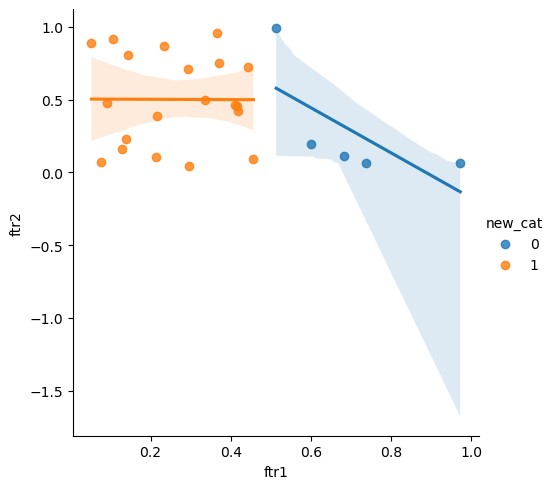

In [65]:
df_changed = df.copy()
df_changed['new_cat'] = df_changed['ftr1'].apply(lambda x: 1 if x < 0.5 else 0)
sns.lmplot(x='ftr1',y='ftr2', hue='new_cat',data=df_changed)
#hue groups the datapoints by their categories in 'new_cat'
plt.show()

### Make samples: <a clas='anchor' id='make_samples'></a>

In [66]:
df_changed = df.copy()
sample_size = 5
#With replacement
sample1 = df_changed.sample(n=sample_size, replace=True)
#Without replacement
sample2 = df_changed.sample(n=sample_size, replace=False)
#Give high values from a given column more weight.
sample3 = df_changed.sample(n=sample_size, replace=False, weights=df_changed['ftr3'])

## Write or read files: <a class='anchor' id='write_read_file'></a>

In [67]:
%%skip
#read csv
data = pd.read_csv('PATH/file_name.csv')
'''data = pd.read_csv('PATH/file_name.csv', skiprows=5, nrows=7, na_values=['N/A', 'n/a'])'''
'''     skips the first five rows, alternatively use skiprows=[3,2,5] -> skips row 3,2 and 5 '''
'''     nrows=7 -> import only the first 7 rows'''
'''     na_values will treat all 'N/A' and 'n/a' entries as NaN as well'''
#write a csv
df.to_csv('name.csv')

#read an excel
data = pd.read_excel('PATH/name.xlsx')

#read a tsv file
df = pd.read_csv('path/to/file.tsv', sep='\t')
df = pd.read_table('path/to/file.tsv')

import pickle
#write a pickle
'''with open('df.pkl', 'wb') as f:
    pickle.dump(df, f)'''

#load a pickle
'''with open('PATH/data.pkl', 'rb') as f:
    data = pickle.load(f)'''

"with open('PATH/data.pkl', 'rb') as f:\n    data = pickle.load(f)"

# Series: <a class='anchor' id='Series'></a>

## Initialize: <a class='anchor' id='initialize_ser'></a>

In [68]:
ser = pd.Series([1, 1,3,3,3, 7, 3, 5, 7, 9])

## Functions: <a class='anchor' id='func_series'></a>

In [69]:
#hide
data = np.random.random(5)
series = pd.Series(data)
series[0] = np.nan

In [70]:
#Detect NaN values (not 0)
series.notnull()
series.isnull()

#Value counts (which value appears how often): (sort_index to have highest count first)
counts = ser.value_counts().reset_index().sort_index()
counts.iloc[0]

a=1

# Numpy <a class='anchor' id='numpy'></a>

## random numbers: <a class='anchor' id='random_numpy'></a>

In [71]:
#Generate 10 random variable between 0 and 1:
data = np.random.random(10)
a=1

## Introduce a NaN number: <a class='anchor' id='nan_numpy'></a>

In [72]:
nan_ = np.nan

## Numpy Array:

In [73]:
empty_array = np.empty([2,2])
zero_array = np.zeros([2,2])

# List: <a class='anchor' id='list'></a>

## Iterate over several lists: <a class='anchor' id='iterate_zip'></a>

In [74]:
list_a = ['a','b','c']
list_b = ['d','e','f','g']
for a, b in zip(list_a, list_b):
    print(a)
    print(b)

#you only iterate n times, where n is min(len(list_a),len(list_b))


a
d
b
e
c
f


## Remove Elements from a list using conditions:

In [75]:
list_ = [1,2,45,3,2,4]

for number in list_:
    if number > 2:
        list_.remove(number)

list_

[1, 2, 3, 2]

## Drop duplicates from a list:

In [76]:
my_list = [1, 2, 3, 2, 1, 4, 5, 4]

my_list = list(set(my_list))

## concatenate lists:

In [95]:
list1 = [4, 5, 4]
list2 = [1, 2, 3, 2]

list_concat = list1 + list2

print(list_concat)


[4, 5, 4, 1, 2, 3, 2]


## Check if an element is in a list

In [99]:
list2 = [1, 2, 3, 2]
print(2 in list2)
print(5 in list2)

True
False


# String: <a class='anchor' id='string'></a>

In [77]:
word= 'aRandomWord'

## Functions: <a class='anchor' id='string_func'></a>

.endswith() <a class='anchor' id='endswith'></a>

In [78]:
word.endswith('Word')

True

lower case / upper case <a class='anchor' id='upp_low_case'></a>

In [79]:
df_special = pd.DataFrame([['Alice', 22, 2], ['Alice', 23, 6], ['Alice', 24, 8],
                            ['Bob', 22, 4], ['Bob', 23, 5], ['Bob', 24, 7],
                            ['Charlie', 22, 4], ['Charlie', 23, 5], ['Charlie', 24, 7],
                            ],
                  columns=['Name', 'day', 'hours'])

In [80]:
df_changed = df_special.copy()
df_changed['Name'] = df_changed['Name'].str.lower() #all words are lowercased.

df_changed['Name'] = df_changed['Name'].str.upper()

#df_changed['Name']

replace / remove characters: <a class='anchor' id='remove_char'></a>

In [81]:
#replace
'33,95'.replace(',', '.')
#replace several characters by one:
import re
a = 'sdf dfsdfx'
re.sub("[sf]", "J", a)
#remove
'334,234,345.43'.replace(',','')


'334234345.43'

# Dict:

## Access elements:

In [82]:
example_dict = {
    "name": "John",
    "age": 30,
    "city": "New York"
}

In [83]:
example_dict['age']

30

## Iterate over a dict:

In [84]:
for key in example_dict.keys():
    print(key)

name
age
city


# General <a class='anchor' id='general_stuff'></a>

### Numbers after the comma <a class='anchor' id='decimal_after_comma'></a>

In [85]:
print('the number {:.3} will be shown with two decimals'.format(3.0394821))

print(round(3.0394821, 2))

the number 3.04 will be shown with two decimals
3.04


### Linspace / arange: <a class='anchor' id='linspace'></a>

In [86]:
a = np.linspace(0,1,100)
a = np.arange(0,1,0.01)

### Calculations: <a class='anchor' id='general_calcs'></a>

#### Mean Squared Error (MSE): <a class='anchor' id='mserror'></a>

In [104]:
%%skip
from sklearn.metrics import mean_squared_error

mean_squared_error(y, predicted)

UsageError: Cell magic `%%skip` not found.


#### Mean Absolute Error (MAE):

In [105]:
from sklearn.metrics import mean_absolute_error

# true values
y_true = [3, -0.5, 2, 7]
# predicted values
y_pred = [2.5, 0.0, 2, 8]

mae = mean_absolute_error(y_true, y_pred)
print(mae)

0.5


### Warnings: <a class='anchor' id='warnings'></a>

In [ ]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Ignore specific warning
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Frequency:

In [ ]:
degseq = df['ftr1']
dmax = max(degseq)+1
freq= [ 0 for d in range(dmax) ]
for d in degseq: #same for degseq_out    
    freq[d] += 1

plt.plot(freq)
plt.ylabel('number of appearances')
plt.xlabel('indegree of targets')